/home/pl5189/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


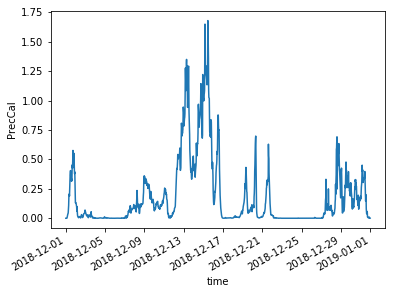

In [6]:
import xarray as xr

ds = xr.open_dataset("/data/GPM_HIM8/GPM_201812.nc")

ds.PrecCal.mean(dim=['x','y']).plot()

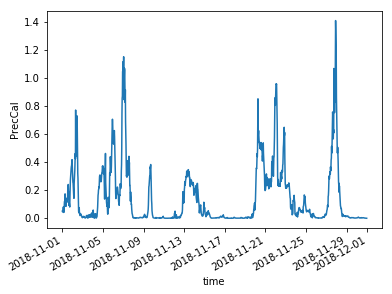

In [7]:
ds = xr.open_dataset("/data/GPM_HIM8/GPM_201811.nc")

ds.PrecCal.mean(dim=['x','y']).plot()

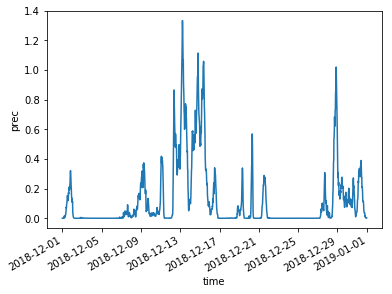

In [8]:
ds = xr.open_dataset("conv_out.nc")

ds.prec.mean(dim=['x','y']).plot()

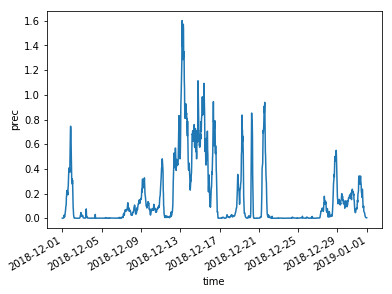

In [9]:
ds = xr.open_dataset("mse_out.nc")

ds.prec.mean(dim=['x','y']).plot()

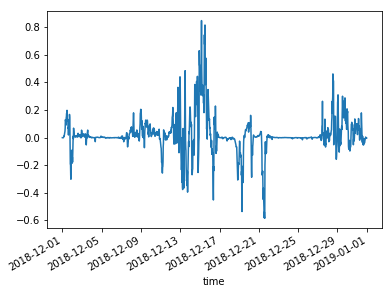

In [10]:
gpm = xr.open_dataset("/data/GPM_HIM8/GPM_201812.nc")
mse = xr.open_dataset("mse_out.nc")

(gpm.PrecCal.mean(dim=['x','y'])-mse.prec.mean(dim=['x','y'])).plot()

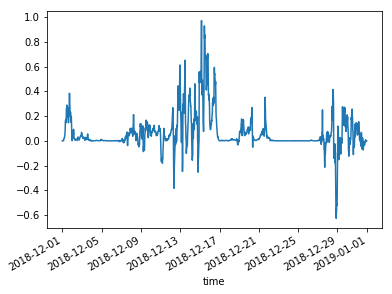

In [11]:
gpm = xr.open_dataset("/data/GPM_HIM8/GPM_201812.nc")
mse = xr.open_dataset("conv_out.nc")

(gpm.PrecCal.mean(dim=['x','y'])-mse.prec.mean(dim=['x','y'])).plot()